# Analisi delle recensioni

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

!ls "/content/gdrive/My Drive/Colab Notebooks/CLEAN_DATA_FOR_ANALYSIS"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
ALL_DATA_TEST_SET.xlsx	    RISTORANTE_15.xlsx	RISTORANTE_3.xlsx
ALL_DATA_TRAINING_SET.xlsx  RISTORANTE_16.xlsx	RISTORANTE_4.xlsx
RISTORANTE_0.xlsx	    RISTORANTE_17.xlsx	RISTORANTE_5.xlsx
RISTORANTE_10.xlsx	    RISTORANTE_18.xlsx	RISTORANTE_6.xlsx
RISTORANTE_11.xlsx	    RISTORANTE_19.xlsx	RISTORANTE_7.xlsx
RISTORANTE_12.xlsx	    RISTORANTE_1.xlsx	RISTORANTE_8.xlsx
RISTORANTE_13.xlsx	    RISTORANTE_20.xlsx	RISTORANTE_9.xlsx
RISTORANTE_14.xlsx	    RISTORANTE_2.

In [2]:
import pandas as pd

ALL_DATA = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/CLEAN_DATA_FOR_ANALYSIS/TUTTI_I_RISTORANTI.xlsx")
display(ALL_DATA[:5])

,Genere,Nomi,Recensioni,Scritta da,Voti
0,M,Gianluca,Complimenti! Ormai non se ne può fare a meno.....,Mobile,5
1,M,Massimo,Delizioso bistrot per le vie del centro. Picco...,Mobile,5
2,M,Armando,Ormai non possiamo farne a meno: piatti fusion...,Mobile,5
3,M,Tommaso,Accolti caldamente da un personale giovanile c...,PC,5
4,M,Umberto,Ristorante molto buono anche se il numero 1 a ...,PC,4


## Donne vs Uomini
Calcoliamo quante recensioni totali hanno fatto gli uomini e quante le donne

In [26]:
ALL_WOMEN = ALL_DATA.loc[(ALL_DATA.Genere == "F")]
ALL_MEN = ALL_DATA.loc[(ALL_DATA.Genere == "M")]

print("Totale recensioni donne:", len(ALL_WOMEN))
print("Totale recensioni uomini:", len(ALL_MEN))

Totale recensioni donne: 4372
Totale recensioni uomini: 4335


Vediamo in base al genere, quali sono i voti.

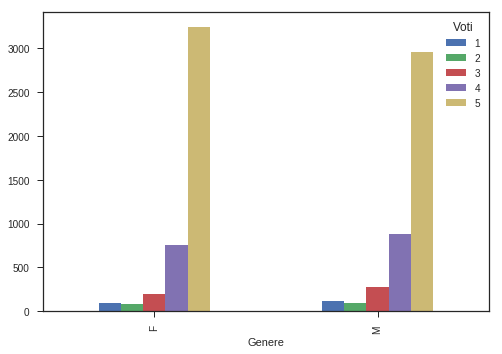

In [31]:
df=ALL_DATA.groupby(['Genere','Voti']).size()
df=df.unstack()
df.plot(kind='bar')

In [28]:
NEGATIVE_WOMEN = ALL_DATA.loc[(ALL_DATA.Voti <= 3) & (ALL_DATA.Genere == "F")]
NEGATIVE_MEN = ALL_DATA.loc[(ALL_DATA.Voti <= 3) & (ALL_DATA.Genere == "M")]

display(len(NEGATIVE_WOMEN))
display(len(NEGATIVE_MEN))

368

492

Vediamo in base al genere, chi scrive maggiormente da PC e chi da mobile.

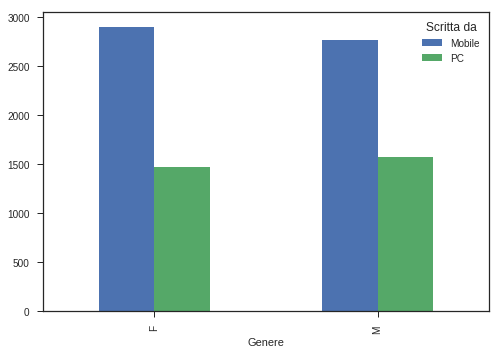

In [44]:
df=ALL_DATA.groupby(['Genere','Scritta da']).size()
df=df.unstack()
df.plot(kind='bar')

## Mobile vs PC
Vediamo se le recensioni cambiano in base al fatto che siano scritte da PC o da mobile.

In [34]:
# Calcoliamo quante recensioni totali sono state fatte da PC e da mobile

ALL_PC = ALL_DATA.loc[(ALL_DATA['Scritta da'] == "PC")]
ALL_MOBILE = ALL_DATA.loc[(ALL_DATA['Scritta da'] == "Mobile")]

print("Totale recensioni PC:", len(ALL_PC))
print("Totale recensioni mobile:", len(ALL_MOBILE))

Totale recensioni PC: 3042
Totale recensioni mobile: 5665


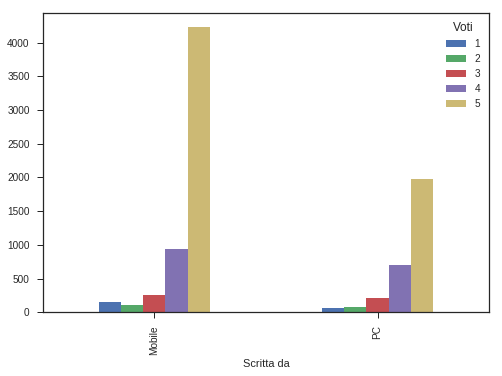

In [32]:
df=ALL_DATA.groupby(['Scritta da','Voti']).size()
df=df.unstack()
df.plot(kind='bar')